# Predicting Car Price Using Linear Regression Model

## Importing All The Required Libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading The Car Dataset

In [2]:
raw_data = pd.read_csv('car.csv')
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


## Data Preprocessing

### Exploring the descriptive statistic of the variables

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interest

In [4]:
data = raw_data.drop(['Model'], axis=1) # Removing model attributes from dataset
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Showing The Number of Missing Value in Each Attribute

In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

### Removing All Missing Values 

In [6]:
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring Probabilty Distribution Function

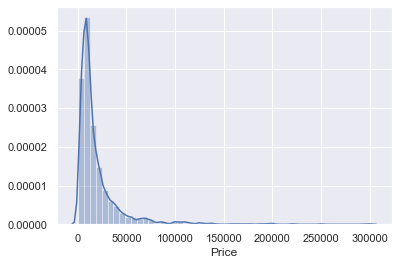

In [7]:
sns.distplot(data_no_mv['Price'])

### Dealing with outliers

In [8]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


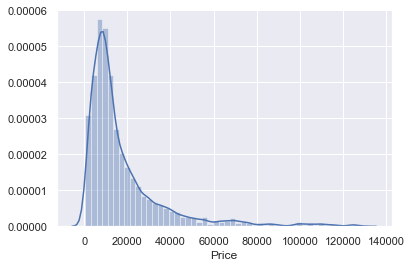

In [9]:
sns.distplot(data_1['Price'])

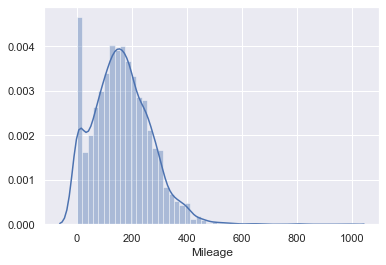

In [10]:
sns.distplot(data_no_mv['Mileage'])

In [11]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

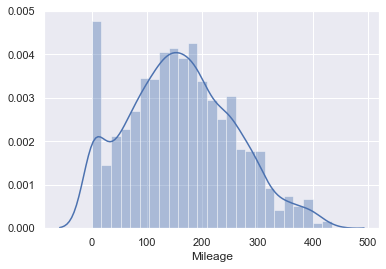

In [12]:
sns.distplot(data_2['Mileage'])

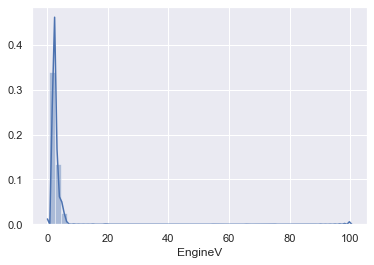

In [13]:
sns.distplot(data_no_mv['EngineV'])

In [14]:
data_3 = data_2[data_2['EngineV']<6.5] #removing all values below 6.5

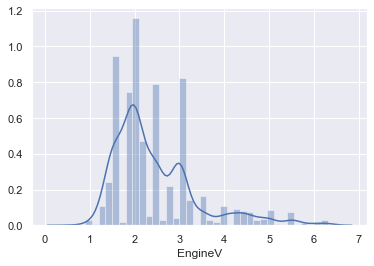

In [15]:
sns.distplot(data_3['EngineV'])

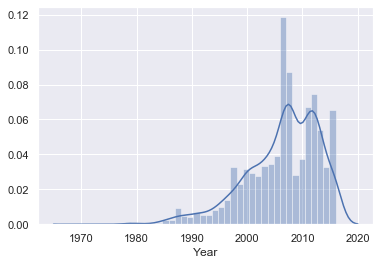

In [16]:
sns.distplot(data_no_mv['Year'])

In [17]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

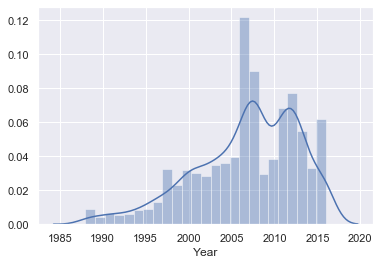

In [18]:
sns.distplot(data_4['Year'])

In [19]:
data_cleaned = data_4.reset_index(drop=True) #reseting the index

In [20]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


### Checking the OLS (Ordinary Least Squares) Assumptions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021C7AF7A438>,
      dtype=object)

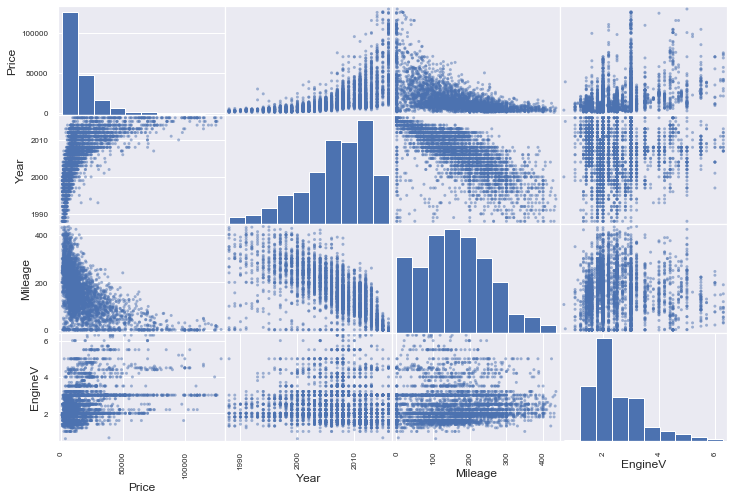

In [21]:
from pandas.plotting import scatter_matrix

attributes = ["Price", "Year", "Mileage", "EngineV"]
scatter_matrix(data_cleaned[attributes], figsize=(12,8))

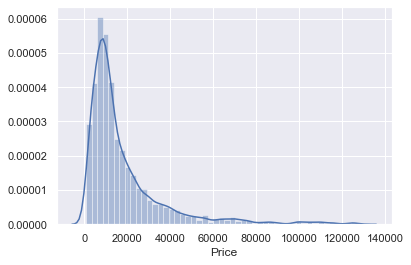

In [22]:
sns.distplot(data_cleaned['Price'])

### Relaxing the Assumptions

In [23]:
log_price = np.log(data_cleaned['Price']) # Appliying log transformation
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3862,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3863,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3864,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3865,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021C7C9DAAC8>,
      dtype=object)

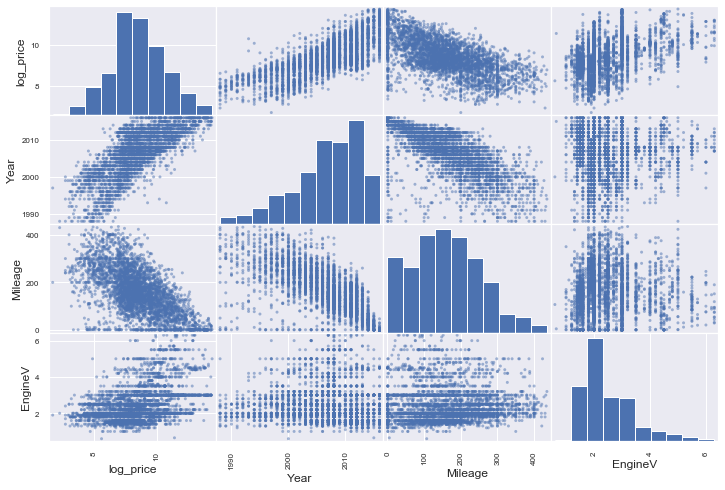

In [24]:
from pandas.plotting import scatter_matrix

attributes = ["log_price", "Year", "Mileage", "EngineV"]
scatter_matrix(data_cleaned[attributes], figsize=(12,8))

In [25]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicolinearity

In [26]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [28]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

### Dealing with Categorical Data

In [29]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True) # Creating dummy variables
data_with_dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [30]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [31]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [32]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,9.350102,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,9.792556,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,11.736069,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,8.779557,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


### Dividing Target and Inputs Data

In [33]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

In [34]:
targets

0        8.342840
1        8.974618
2        9.495519
3       10.043249
4        9.814656
          ...    
3862     9.350102
3863     9.792556
3864    11.736069
3865     8.779557
3866     9.510445
Name: log_price, Length: 3867, dtype: float64

In [35]:
inputs

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3862,163,2.5,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3863,35,1.6,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3864,9,3.0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3865,1,3.5,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [36]:
input_array = np.array(inputs)

### Scaling Input Data

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
input_scaled = scaler.fit_transform(inputs)

### Split The Data into Train and Test

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_scaled, targets, test_size=0.2, random_state=55)

In [39]:
len(x_train)

3093

In [40]:
len(x_test)

774

## Using Linear Regression Model

In [41]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predicting Training Data

In [42]:
y_hat = reg.predict(x_train)

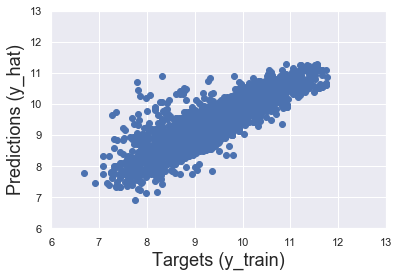

In [43]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residual PDF')

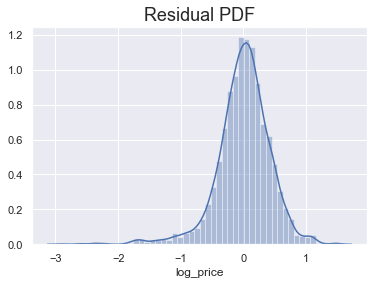

In [44]:
sns.distplot(y_train - y_hat)
plt.title('Residual PDF', size=18)

### Getting the score a.k.a model accuracy

In [45]:
reg.score(x_train, y_train)

0.7546433218542205

### Finding the weights and bias

In [46]:
reg.intercept_  # Bias

9.418402380424096

In [47]:
reg.coef_  # Weights

array([-0.46208071,  0.21996632,  0.01259177,  0.00684914, -0.1370885 ,
       -0.18497304, -0.06295502, -0.09336423, -0.14003433, -0.09578106,
       -0.19211546, -0.12053335, -0.1531249 , -0.11820237, -0.03004683,
       -0.15049615,  0.31778106])

In [48]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.462081
1,EngineV,0.219966
2,Brand_BMW,0.012592
3,Brand_Mercedes-Benz,0.006849
4,Brand_Mitsubishi,-0.137089
5,Brand_Renault,-0.184973
6,Brand_Toyota,-0.062955
7,Brand_Volkswagen,-0.093364
8,Body_hatch,-0.140034
9,Body_other,-0.095781


In [49]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

### Predicting the test data

In [50]:
y_hat_test = reg.predict(x_test)

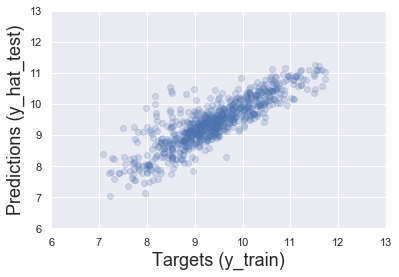

In [51]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [52]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf

,Prediction
0,3945.764428
1,25394.935768
2,34773.198607
3,62425.396077
4,3422.281181
...,...
769,1947.495419
770,11664.799819
771,22709.465924
772,44108.605355


In [53]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,3945.764428,NaN
1,25394.935768,NaN
2,34773.198607,13300.0
3,62425.396077,NaN
4,3422.281181,NaN
...,...,...
769,1947.495419,NaN
770,11664.799819,22900.0
771,22709.465924,8900.0
772,44108.605355,NaN


In [54]:
y_test = y_test.reset_index(drop=True)
y_test

0       9.648595
1       9.961756
2      10.477288
3      11.196844
4       7.740664
         ...    
769     8.242756
770     9.159047
771     9.457200
772    10.849337
773     7.823646
Name: log_price, Length: 774, dtype: float64

In [55]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,3945.764428,15500.0
1,25394.935768,21200.0
2,34773.198607,35500.0
3,62425.396077,72900.0
4,3422.281181,2300.0
...,...,...
769,1947.495419,3800.0
770,11664.799819,9500.0
771,22709.465924,12800.0
772,44108.605355,51500.0


### Analyzing the prediction

In [56]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [57]:
df_pf['Difference%'] = np.absolute((df_pf['Residual']/df_pf['Target'])*100)
df_pf

,Prediction,Target,Residual,Difference%
0,3945.764428,15500.0,11554.235572,74.543455
1,25394.935768,21200.0,-4194.935768,19.787433
2,34773.198607,35500.0,726.801393,2.047328
3,62425.396077,72900.0,10474.603923,14.368455
4,3422.281181,2300.0,-1122.281181,48.794834
...,...,...,...,...
769,1947.495419,3800.0,1852.504581,48.750121
770,11664.799819,9500.0,-2164.799819,22.787367
771,22709.465924,12800.0,-9909.465924,77.417703
772,44108.605355,51500.0,7391.394645,14.352223


In [58]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,16117.723297,17817.537739,1699.814442,40.003962
std,13004.974142,18832.737322,10360.177769,69.060073
min,1124.710347,1200.000000,-33534.208414,0.012507
25%,7671.446597,6800.000000,-2239.031376,10.849213
50%,11955.367047,11500.000000,120.531449,23.962413
75%,20340.288721,22475.000000,3310.639312,41.124147
max,76455.214768,124000.000000,76948.540105,717.901542


In [59]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
424,12201.53,12200.00,-1.53,0.01
63,13002.30,12999.00,-3.30,0.03
164,7182.65,7200.00,17.35,0.24
737,6520.95,6500.00,-20.95,0.32
325,8966.02,9000.00,33.98,0.38
283,32354.81,32500.00,145.19,0.45
626,24911.71,24800.00,-111.71,0.45
286,3979.80,4000.00,20.20,0.51
8,16894.53,16999.00,104.47,0.61
252,29077.71,28900.00,-177.71,0.61
